# Storytelling Data Visualization on Exchange Rates



In [249]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [250]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.info()
exchange_rates.describe




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6177 non-null   object 
 1   [Australian dollar ]      6177 non-null   object 
 2   [Bulgarian lev ]          5775 non-null   object 
 3   [Brazilian real ]         5909 non-null   object 
 4   [Canadian dollar ]        6177 non-null   object 
 5   [Swiss franc ]            6177 non-null   object 
 6   [Chinese yuan renminbi ]  5909 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6177 non-null   object 
 9   [Danish krone ]           6177 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6177 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6177 non-null   object 
 14  [Croatia

<bound method NDFrame.describe of      Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0      2022-11-15               1.5415           1.9558            5.5480   
1      2022-11-14               1.5427           1.9558            5.4605   
2      2022-11-11               1.5459           1.9558            5.5147   
3      2022-11-10               1.5525           1.9558            5.2860   
4      2022-11-09               1.5538           1.9558            5.1947   
...           ...                  ...              ...               ...   
6172   1999-01-08               1.8406              NaN               NaN   
6173   1999-01-07               1.8474              NaN               NaN   
6174   1999-01-06               1.8820              NaN               NaN   
6175   1999-01-05               1.8944              NaN               NaN   
6176   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [C

We observe that our dataset has 41 columns and 6177 rows. 

In [251]:
exchange_rates.head(5)


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-11-15,1.5415,1.9558,5.5480,1.3816,0.9790,7.3299,NaN,24.326,7.4388,...,4.9116,NaN,10.8081,1.4238,NaN,NaN,36.9390,19.3608,1.0404,17.8822
1,2022-11-14,1.5427,1.9558,5.4605,1.3706,0.9751,7.2906,NaN,24.289,7.4382,...,4.9043,NaN,10.7713,1.4177,NaN,NaN,36.9780,19.1923,1.0319,17.8393
2,2022-11-11,1.5459,1.9558,5.5147,1.3698,0.9844,7.3267,NaN,24.278,7.4384,...,4.8940,NaN,10.7241,1.4199,NaN,NaN,37.0880,19.0987,1.0308,17.7944
3,2022-11-10,1.5525,1.9558,5.2860,1.3467,0.9834,7.2184,NaN,24.361,7.4381,...,4.8913,NaN,10.8743,1.3963,NaN,NaN,36.7000,18.5100,0.9954,17.6882
4,2022-11-09,1.5538,1.9558,5.1947,1.3501,0.9880,7.2813,NaN,24.337,7.4382,...,4.9045,NaN,10.8450,1.4061,NaN,NaN,36.9990,18.6728,1.0039,17.8770


# Part 2: Data Cleaning and Preparing the Dataset

### I. Cleaning Null Values

Lets begin by checking null values in our dataset:

In [252]:
exchange_rates.isnull().sum()

Period\Unit:                   0
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3831
[Czech koruna ]                0
[Danish krone ]                0
[Estonian kroon ]           3047
[UK pound sterling ]           0
[Greek drachma ]            5657
[Hong Kong dollar ]            0
[Croatian kuna ]             268
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         2018
[Latvian lats ]             2273
[Maltese lira ]             3831
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian krone ]             0
[New Zealand dollar ]          0
[Philippine peso ]             0
[Polish zl

We also check is our dataset contains null values.
We observe that several country currencies have null values. Lets fix this by removing the null values and replacing them.

### II. Changing Column Names


Renaming the US dollar and Period'Unit column to US_dollar and Time. 

Next, changing the Time column to datetime data type and sort the values in ascending order.

In [253]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Lets isolate the Time and US_dollar columns, and assign the to a variable euro_to_dollar.

In [254]:

euro_to_dollar = pd.DataFrame({'Time':exchange_rates['Time'], 'US_dollar':exchange_rates['US_dollar']})


In [255]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3640     1
1.3666     1
1.3753     1
1.3782     1
1.0404     1
Name: US_dollar, Length: 3692, dtype: int64

In [256]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6115 entries, 0 to 6176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6115 non-null   datetime64[ns]
 1   US_dollar  6115 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.3 KB


### III. Rolling Mean

Lets visualize and generate a line plt to observe the evoultion of the euro-dollar exchange rate.

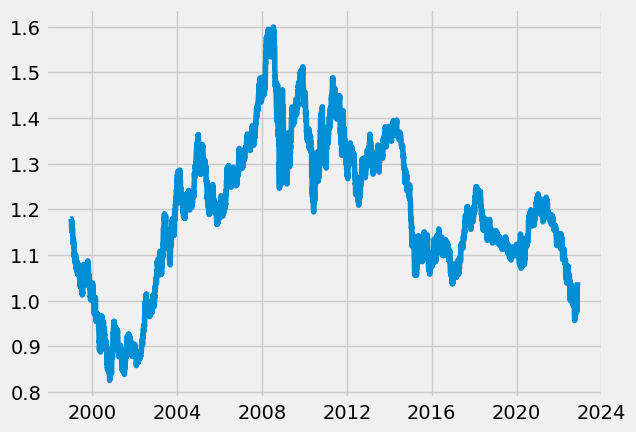

In [257]:

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Lets create a rolling mean for 'US_dollar' column for 30 days moving window.

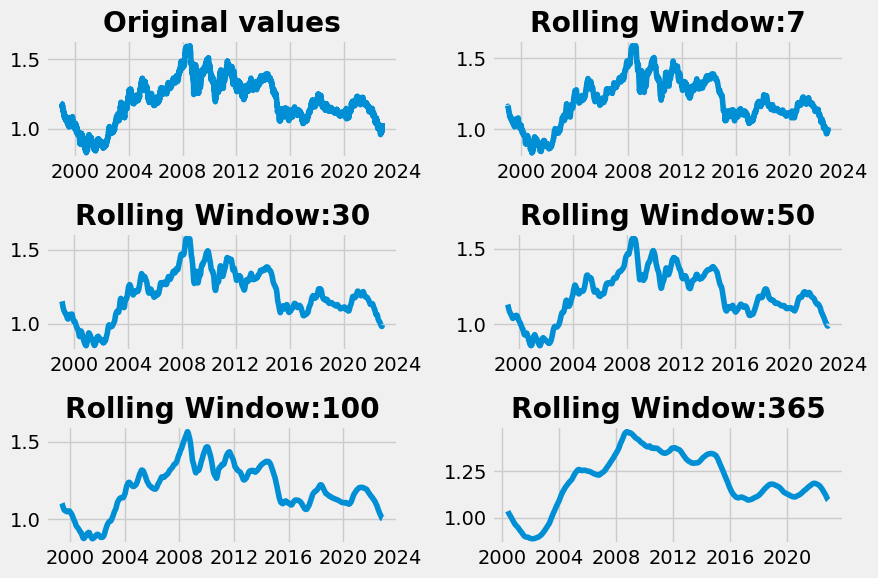

In [258]:
plt.figure(figsize=(9, 6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip ([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):    
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')

plt.tight_layout()
plt.show()


In [259]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.head(10)

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


Lets create a visulization grid graph to show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). Generated graph will be a  line plot.

C:\Users\kuria\AppData\Local\Temp\ipykernel_28308\3192945505.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
C:\Users\kuria\AppData\Local\Temp\ipykernel_28308\3192945505.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
C:\Users\kuria\AppData\Local\Temp\ipykernel_28308\3192945505.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


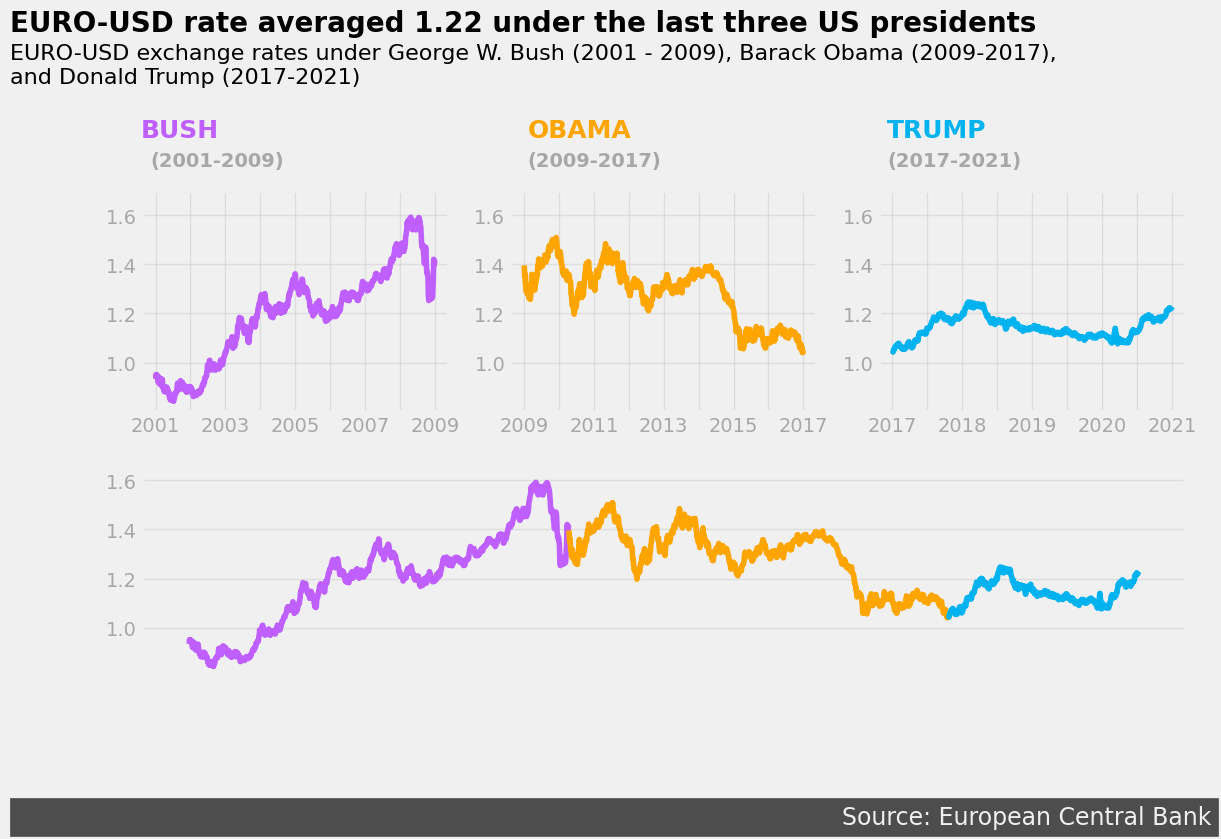

In [340]:
### Adding the FiveThirtyEight style
plt.style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    #ax.set_xticks([])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(11170.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(11270.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(14280.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(14280.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17140.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17140.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(9800.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(9800.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(10000.0, 0.2, '' + ' '*110 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=17)

plt.show()